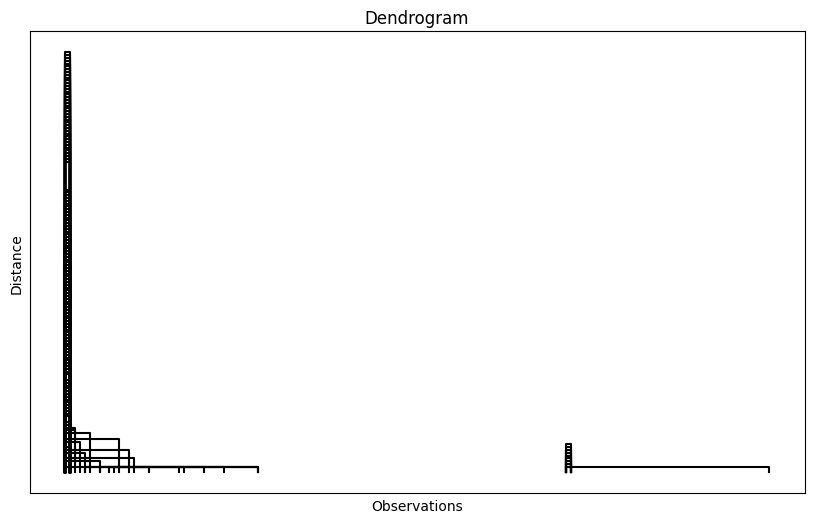

[157 157 160 160 162 163 163 164 167 168 168 169 170 170 171 172 173 174
 175 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 256 256 256 256 256 256
 256 256 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class AgglomerativeClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
   
    def fit(self, X):
        clusters = [[i] for i in range(X.shape[0])]
        dist_matrix = np.zeros((X.shape[0], X.shape[0]))
        for i in range(X.shape[0]):
            for j in range(i+1, X.shape[0]):
                dist_matrix[i,j] = np.linalg.norm(X[i,:] - X[j,:])
        dendrogram = np.zeros((X.shape[0]-1, 4))
        for i in range(X.shape[0]-1):
            min_dist = np.inf
            for j in range(len(clusters)):
                for k in range(j+1, len(clusters)):
                    dist = np.min(dist_matrix[clusters[j],:][:,clusters[k]])
                    if dist < min_dist:
                        min_dist = dist
                        merge_clusters = (j,k)
            dendrogram[i,0] = merge_clusters[0]
            dendrogram[i,1] = merge_clusters[1]
            dendrogram[i,2] = min_dist
            dendrogram[i,3] = len(clusters[merge_clusters[0]]) + len(clusters[merge_clusters[1]])
            clusters[merge_clusters[0]] += clusters[merge_clusters[1]]
            del clusters[merge_clusters[1]]
            # Update the distance matrix
            for j in range(len(clusters)-1):
                for k in range(j+1, len(clusters)):
                    min_dists = []
                    for l in clusters[j]:
                        for m in clusters[k]:
                            min_dists.append(dist_matrix[l,m])
                    dist_matrix[j,k] = min(min_dists)
                    dist_matrix[k,j] = dist_matrix[j,k]
        self.labels_ = np.zeros(X.shape[0], dtype=np.int32)
        for i in range(X.shape[0]):
            for j in range(dendrogram.shape[0]):
                if dendrogram[j,0] <= i < dendrogram[j,3]:
                    self.labels_[i] = j + X.shape[0] - self.n_clusters
                    break
        self.dendrogram = dendrogram
   

    def plot_dendrogram(self):
        # Plot the dendrogram
        plt.figure(figsize=(10,6))
        plt.title('Dendrogram')
        plt.xlabel('Observations')
        plt.ylabel('Distance')
        plt.xticks([])
        plt.yticks([])
        for i in range(self.dendrogram.shape[0]):
            x1 = self.dendrogram[i,0]
            x2 = self.dendrogram[i,1]
            y1 = self.dendrogram[i,2]
            y2 = self.dendrogram[i,3]
            plt.plot([x1,x1,x2,x2], [y1,y2,y2,y1], 'k-')
        plt.show()


iris = load_iris()
X = iris.data

n_clusters = 3
model = AgglomerativeClustering(n_clusters)

model.fit(X)
model.plot_dendrogram()

print(model.labels_)
